# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=4)

Epoch 1/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3376s 2s/step - accuracy: 0.4201 - loss: 2.0517 - val_accuracy: 0.8487 - val_loss: 0.4857
Epoch 2/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3262s 1s/step - accuracy: 0.8417 - loss: 0.4930 - val_accuracy: 0.9137 - val_loss: 0.2783
Epoch 3/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3234s 1s/step - accuracy: 0.9095 - loss: 0.2835 - val_accuracy: 0.9278 - val_loss: 0.2213
Epoch 4/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3034s 1s/step - accuracy: 0.9378 - loss: 0.1903 - val_accuracy: 0.9429 - val_loss: 0.1771


## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 809s 368ms/step - accuracy: 0.9646 - loss: 0.1089
Training accuracy: 0.969144344329834


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step - accuracy: 0.9406 - loss: 0.1824
Validation accuracy: 0.9429205656051636


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6196315288543701,
  0.8646276593208313,
  0.9180311560630798,
  0.9423571825027466],
 'loss': [1.2888542413711548,
  0.4250168800354004,
  0.25507652759552,
  0.1759926676750183],
 'val_accuracy': [0.8486797213554382,
  0.9137263894081116,
  0.9278397560119629,
  0.9429205656051636],
 'val_loss': [0.4856773316860199,
  0.27825847268104553,
  0.22134478390216827,
  0.17707063257694244]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# epochs = [i for i in range(1,11)]
# plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
# plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
# plt.xlabel('No. of Epochs')
# plt.title('Visualization of Accuracy Result')
# plt.legend()
# plt.show()

## Accuracy Visualization

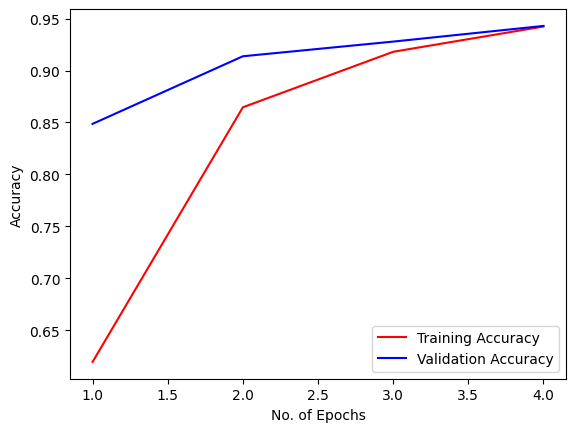

In [ ]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Some other metrics for model evaluation

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 579s 33ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.88      0.93       504
                                 Apple___Black_rot       0.97      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.98      0.87      0.92       502
                               Blueberry___healthy       0.90      0.98      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.81      0.89       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

### Confusion Matrix Visualization

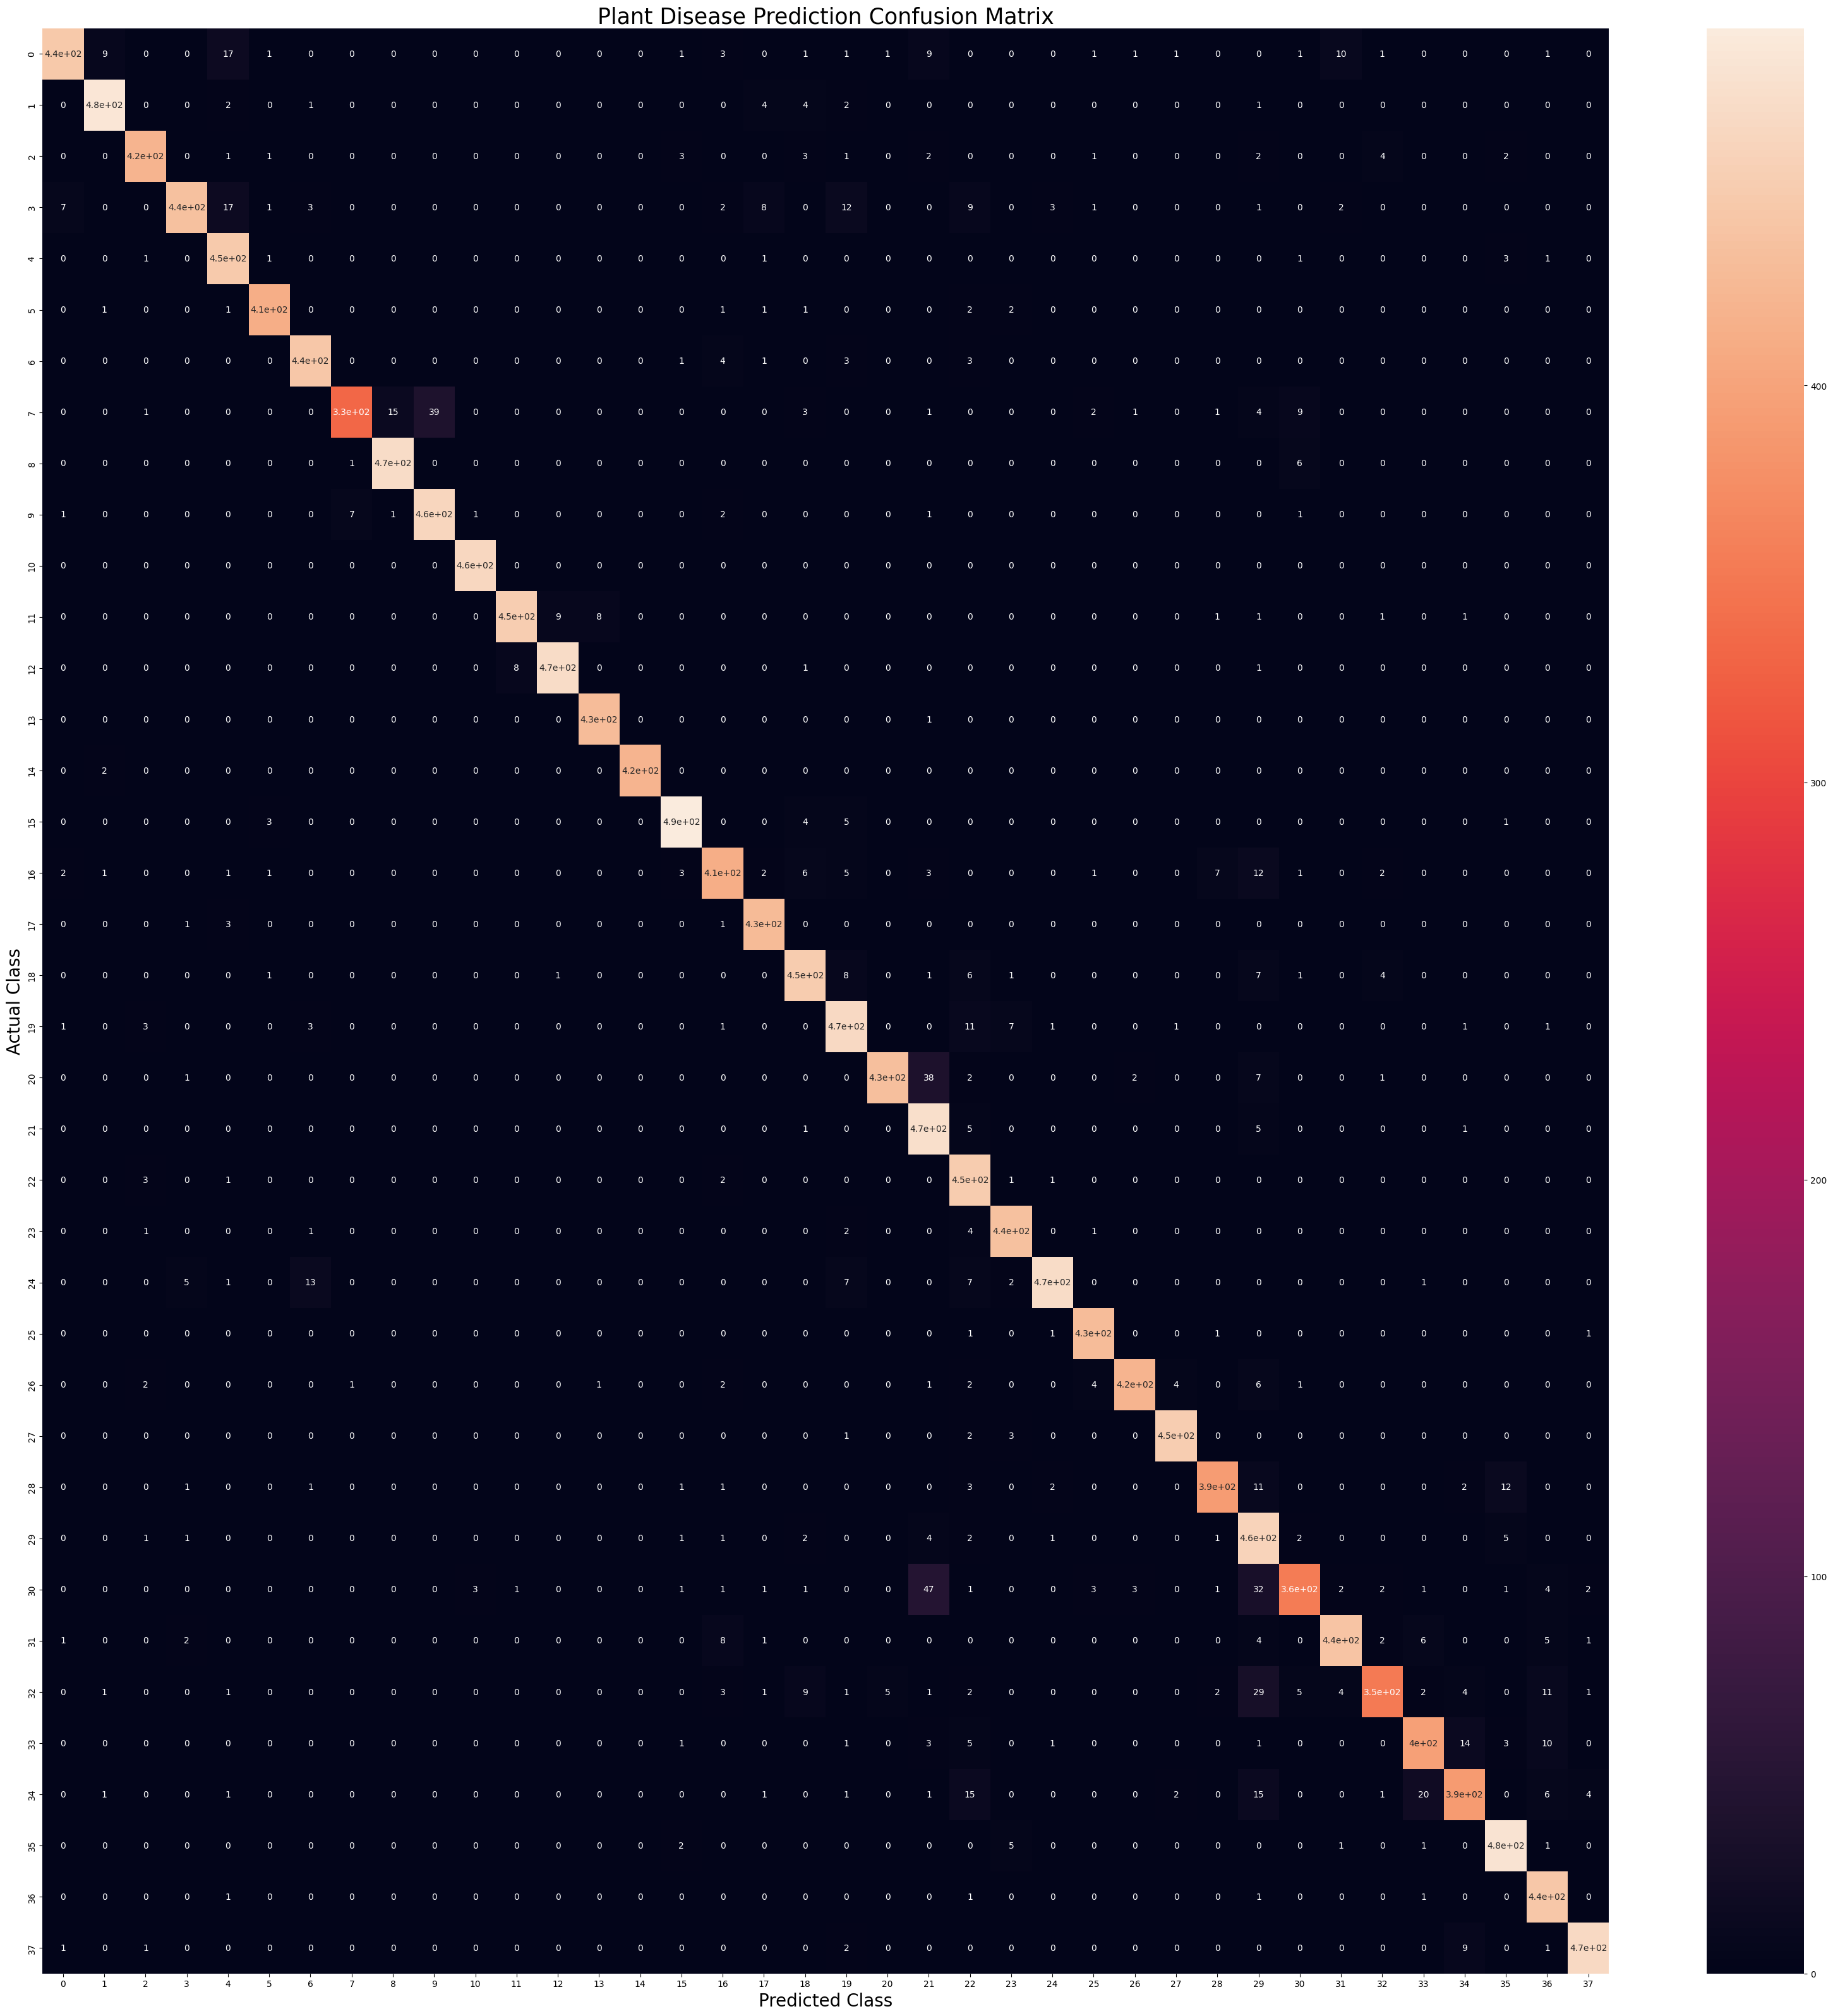

In [35]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()